In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
pd.set_option('display.max_columns', None)

In [2]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_climate_and_fire_full.csv')
fire_climate_df.shape

(164, 70)

In [3]:
fire_climate_df.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,median_income,median_income_level,seaside_inland,stations,station_latitude,station_longitude,started_date_str
0,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2017-06-26,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Riverside,6309.0,False,CAL FIRE/Riverside County Fire,NaN,2017,True,/incidents/2017/6/26/manzanita-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2018-01-09T11:08:00Z,NaN,False,True,NaN,NaN,NaN,33.530045,"Hwy 79 North, Lambs Canyon south of Dump Road,...",-116.594422,False,Manzanita Fire,100.0,NaN,True,"The Manzanita Fire started on June 26, 2017 of...","Hwy 79 North, Lambs Canyon, Riverside County, ...",2017-06-26T15:10:00Z,Finalized,NaN,NaN,NaN,NaN,ca0c9a5f-7a1a-4903-b790-6eb3e85e7e64,2018-01-09T11:08:00Z,NaN,63948.0,3,inland,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,2017-06-26
1,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,100.0,2017-12-07,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,4100.0,False,CAL FIRE San Diego Unit,NaN,2017,True,/incidents/2017/12/7/lilac-fire/,"<p>12/13/17 PM - See the latest <a href=""http:...",All roads reopened.,San Diego,37,NaN,NaN,NaN,2018-01-09T13:47:00Z,NaN,False,True,NaN,NaN,NaN,33.323700,"Old Hwy 395 at Dulin Road, Bonsall",-117.163000,True,Lilac Fire,100.0,NaN,True,"The Lilac Fire started on December 7, 2017 at ...","Lilac Fire, San Diego County, December 7, 2017...",2017-12-07T11:15:00Z,Finalized,64.0,157.0,NaN,NaN,fc4fcd00-8eee-43e5-b77f-bbd0c1669744,2018-01-09T13:47:00Z,NaN,74855.0,4,seaside,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,2017-12-07


# Simple linear regression

- select AWND and AcresBurned to run the Simple linear regression

In [4]:
awnd_acres_sub_df = fire_climate_df[['AWND', 'AcresBurned']]
awnd_acres_sub_df.head(2)

,AWND,AcresBurned
0,9.17,6309.0
1,6.26,4100.0


# Exploring the data for Simple linear regression

In [5]:
awnd_acres_sub_df.describe()

,AWND,AcresBurned
count,164.000000,162.000000
mean,5.998293,326.438272
std,2.464238,1238.451437
min,2.460000,0.000000
25%,4.700000,20.000000
50%,5.370000,42.500000
75%,6.317500,153.750000
max,15.430000,13139.000000


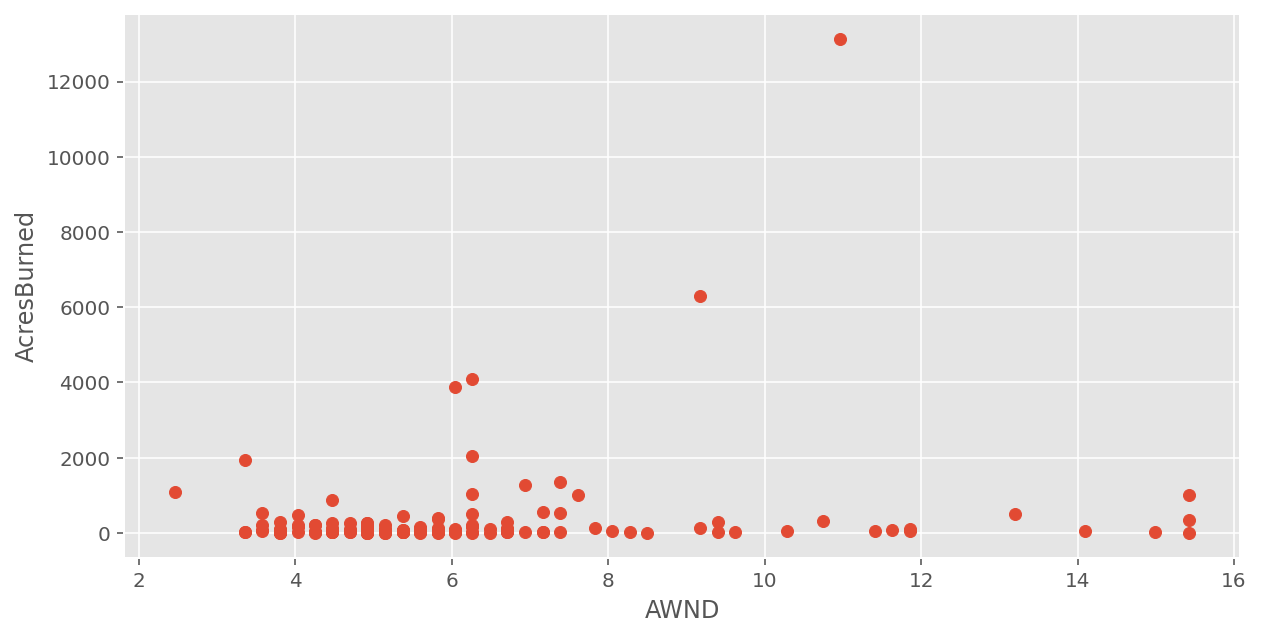

In [6]:
plt.scatter(awnd_acres_sub_df.AWND, awnd_acres_sub_df.AcresBurned)
plt.xlabel('AWND')
plt.ylabel('AcresBurned')
plt.show();

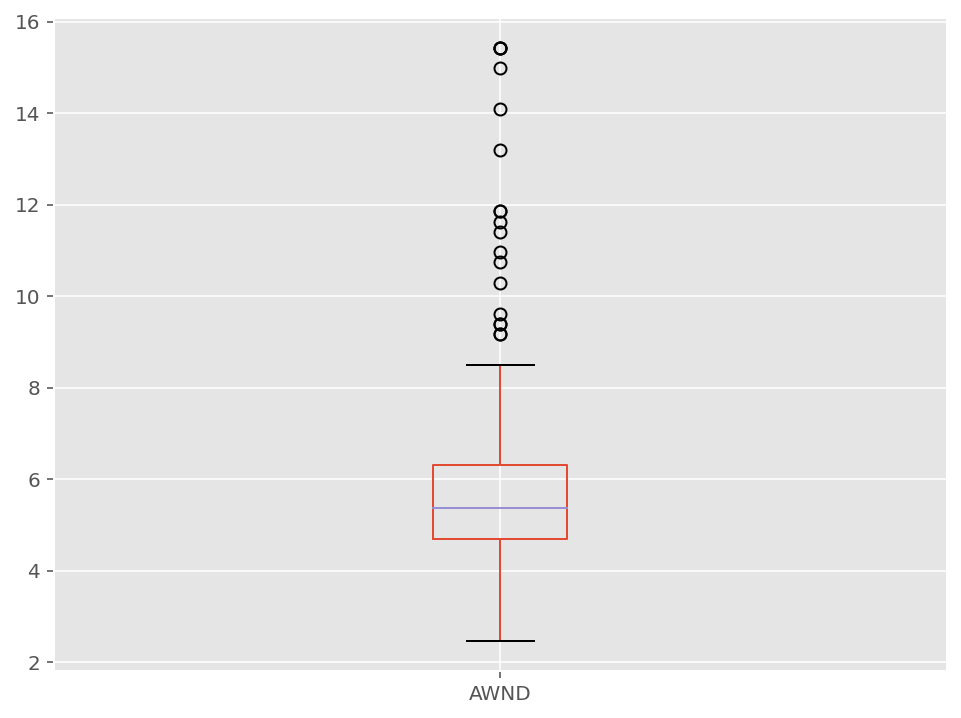

In [7]:
# Using box plot to show the AcresBurned
fig = plt.figure(figsize=(8, 6))

boxplot = awnd_acres_sub_df[['AWND']].boxplot()
plt.title("")
plt.show()

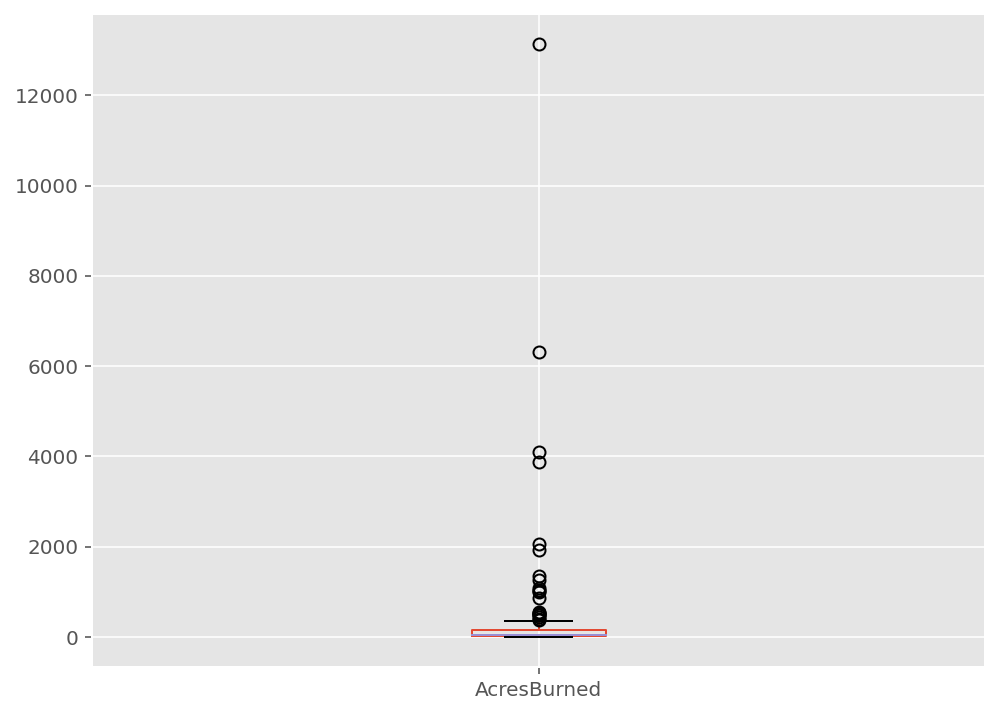

In [8]:
# Using box plot to show the AcresBurned
fig = plt.figure(figsize=(8, 6))

boxplot = awnd_acres_sub_df[['AcresBurned']].boxplot()
plt.title("")
plt.show()

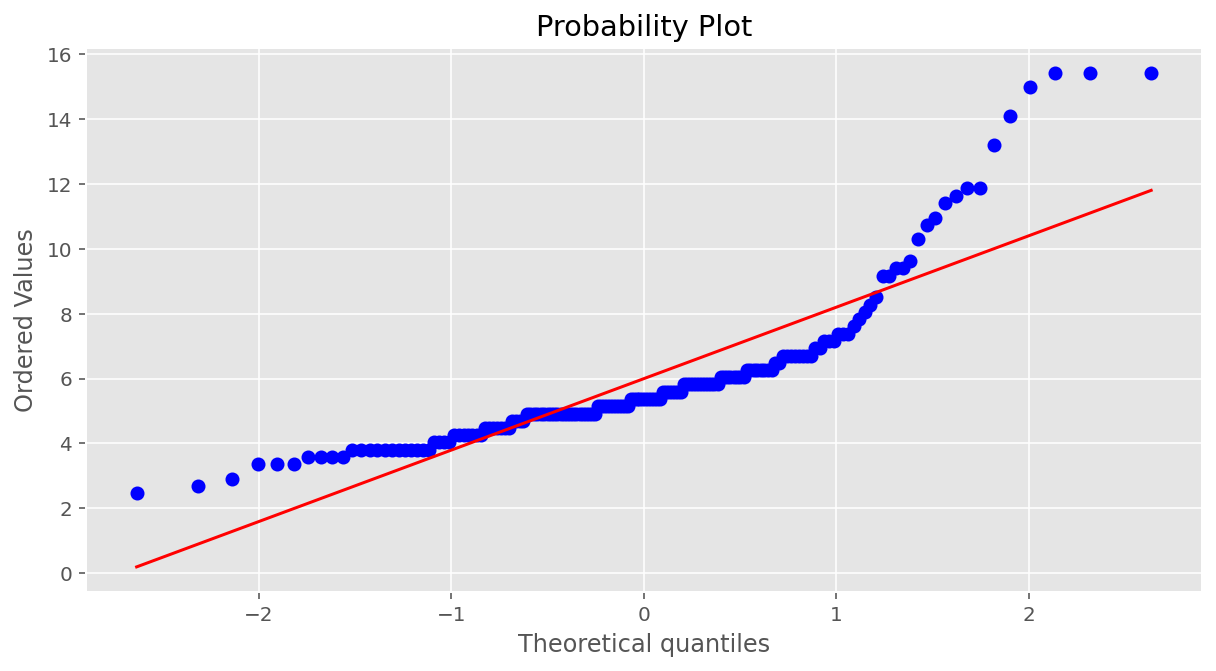

In [9]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(awnd_acres_sub_df['AWND'], plot = plt)
plt.show();

# Do the LinearRegression

In [10]:
awnd_acres_sub_df['AWND'].isnull().sum()

0

In [11]:
awnd_acres_sub_df['AcresBurned'].isnull().sum()

2

In [12]:
awnd_acres_sub_df.dropna(inplace=True)

<ipython-input-12-a3d965057891>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awnd_acres_sub_df.dropna(inplace=True)


In [13]:
x_arr = awnd_acres_sub_df['AWND'].to_numpy().reshape(-1, 1)
y_arr = awnd_acres_sub_df['AcresBurned'].to_numpy().reshape(-1, 1)

In [14]:
lr_model = LinearRegression()
lr_model.fit(x_arr, y_arr)

LinearRegression()

In [15]:
coef = lr_model.coef_
intercept = lr_model.intercept_

print('Slope:', coef[0][0])
print('Intercept:', intercept[0])

Slope: 96.19416678850357
Intercept: -254.3666688940679


In [16]:
y_predict = lr_model.predict(x_arr)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
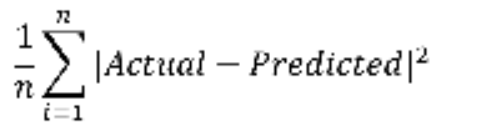

In [18]:
MSE = mean_squared_error(y_arr, y_predict) # mean stand error of (y and y_predict) 
R2 = r2_score(y_arr, y_predict)

print('MSE:', MSE)

print('R-squared:', R2)

MSE: 1468945.167555396
R-squared: 0.036311313489593156


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
# to see more detail
m = ols('AcresBurned ~ AWND', awnd_acres_sub_df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AcresBurned   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.029
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0151
Time:                        23:39:30   Log-Likelihood:                -1380.1
No. Observations:                 162   AIC:                             2764.
Df Residuals:                     160   BIC:                             2770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -254.3667    255.216     -0.997      0.320    -758.394     249.661
AWND          96.1942     39.177      2.455      0.015      18.823     173.566
==============================================================================
Omnibus:                      266.346   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32190.525
Skew:                           7.503   Prob(JB):                         0.00
Kurtosis:                      70.408   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion: Simple linear regression

- x is AWND
- y is AcresBurned

- formula is y = intercept + coef * x

In [21]:
print(" y = %0.8f + %0.8f * x " %(intercept, coef))

 y = -254.36666889 + 96.19416679 * x 


In [22]:
print("R2 is %0.8f . R2 is a lot less than 1 " %R2)

R2 is 0.03631131 . R2 is a lot less than 1 


The simple linear regression is not good.

# The simple linear regression is not good, so we will use Mulitple linear regression

In [23]:
sub_mulit_df = fire_climate_df[['ELEVATION','AWND','PRCP','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5','AcresBurned']]
sub_mulit_df.head(2)

,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,AcresBurned
0,124.7,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,6309.0
1,100.0,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,4100.0


 We can actually take a look at the relationships between all variables

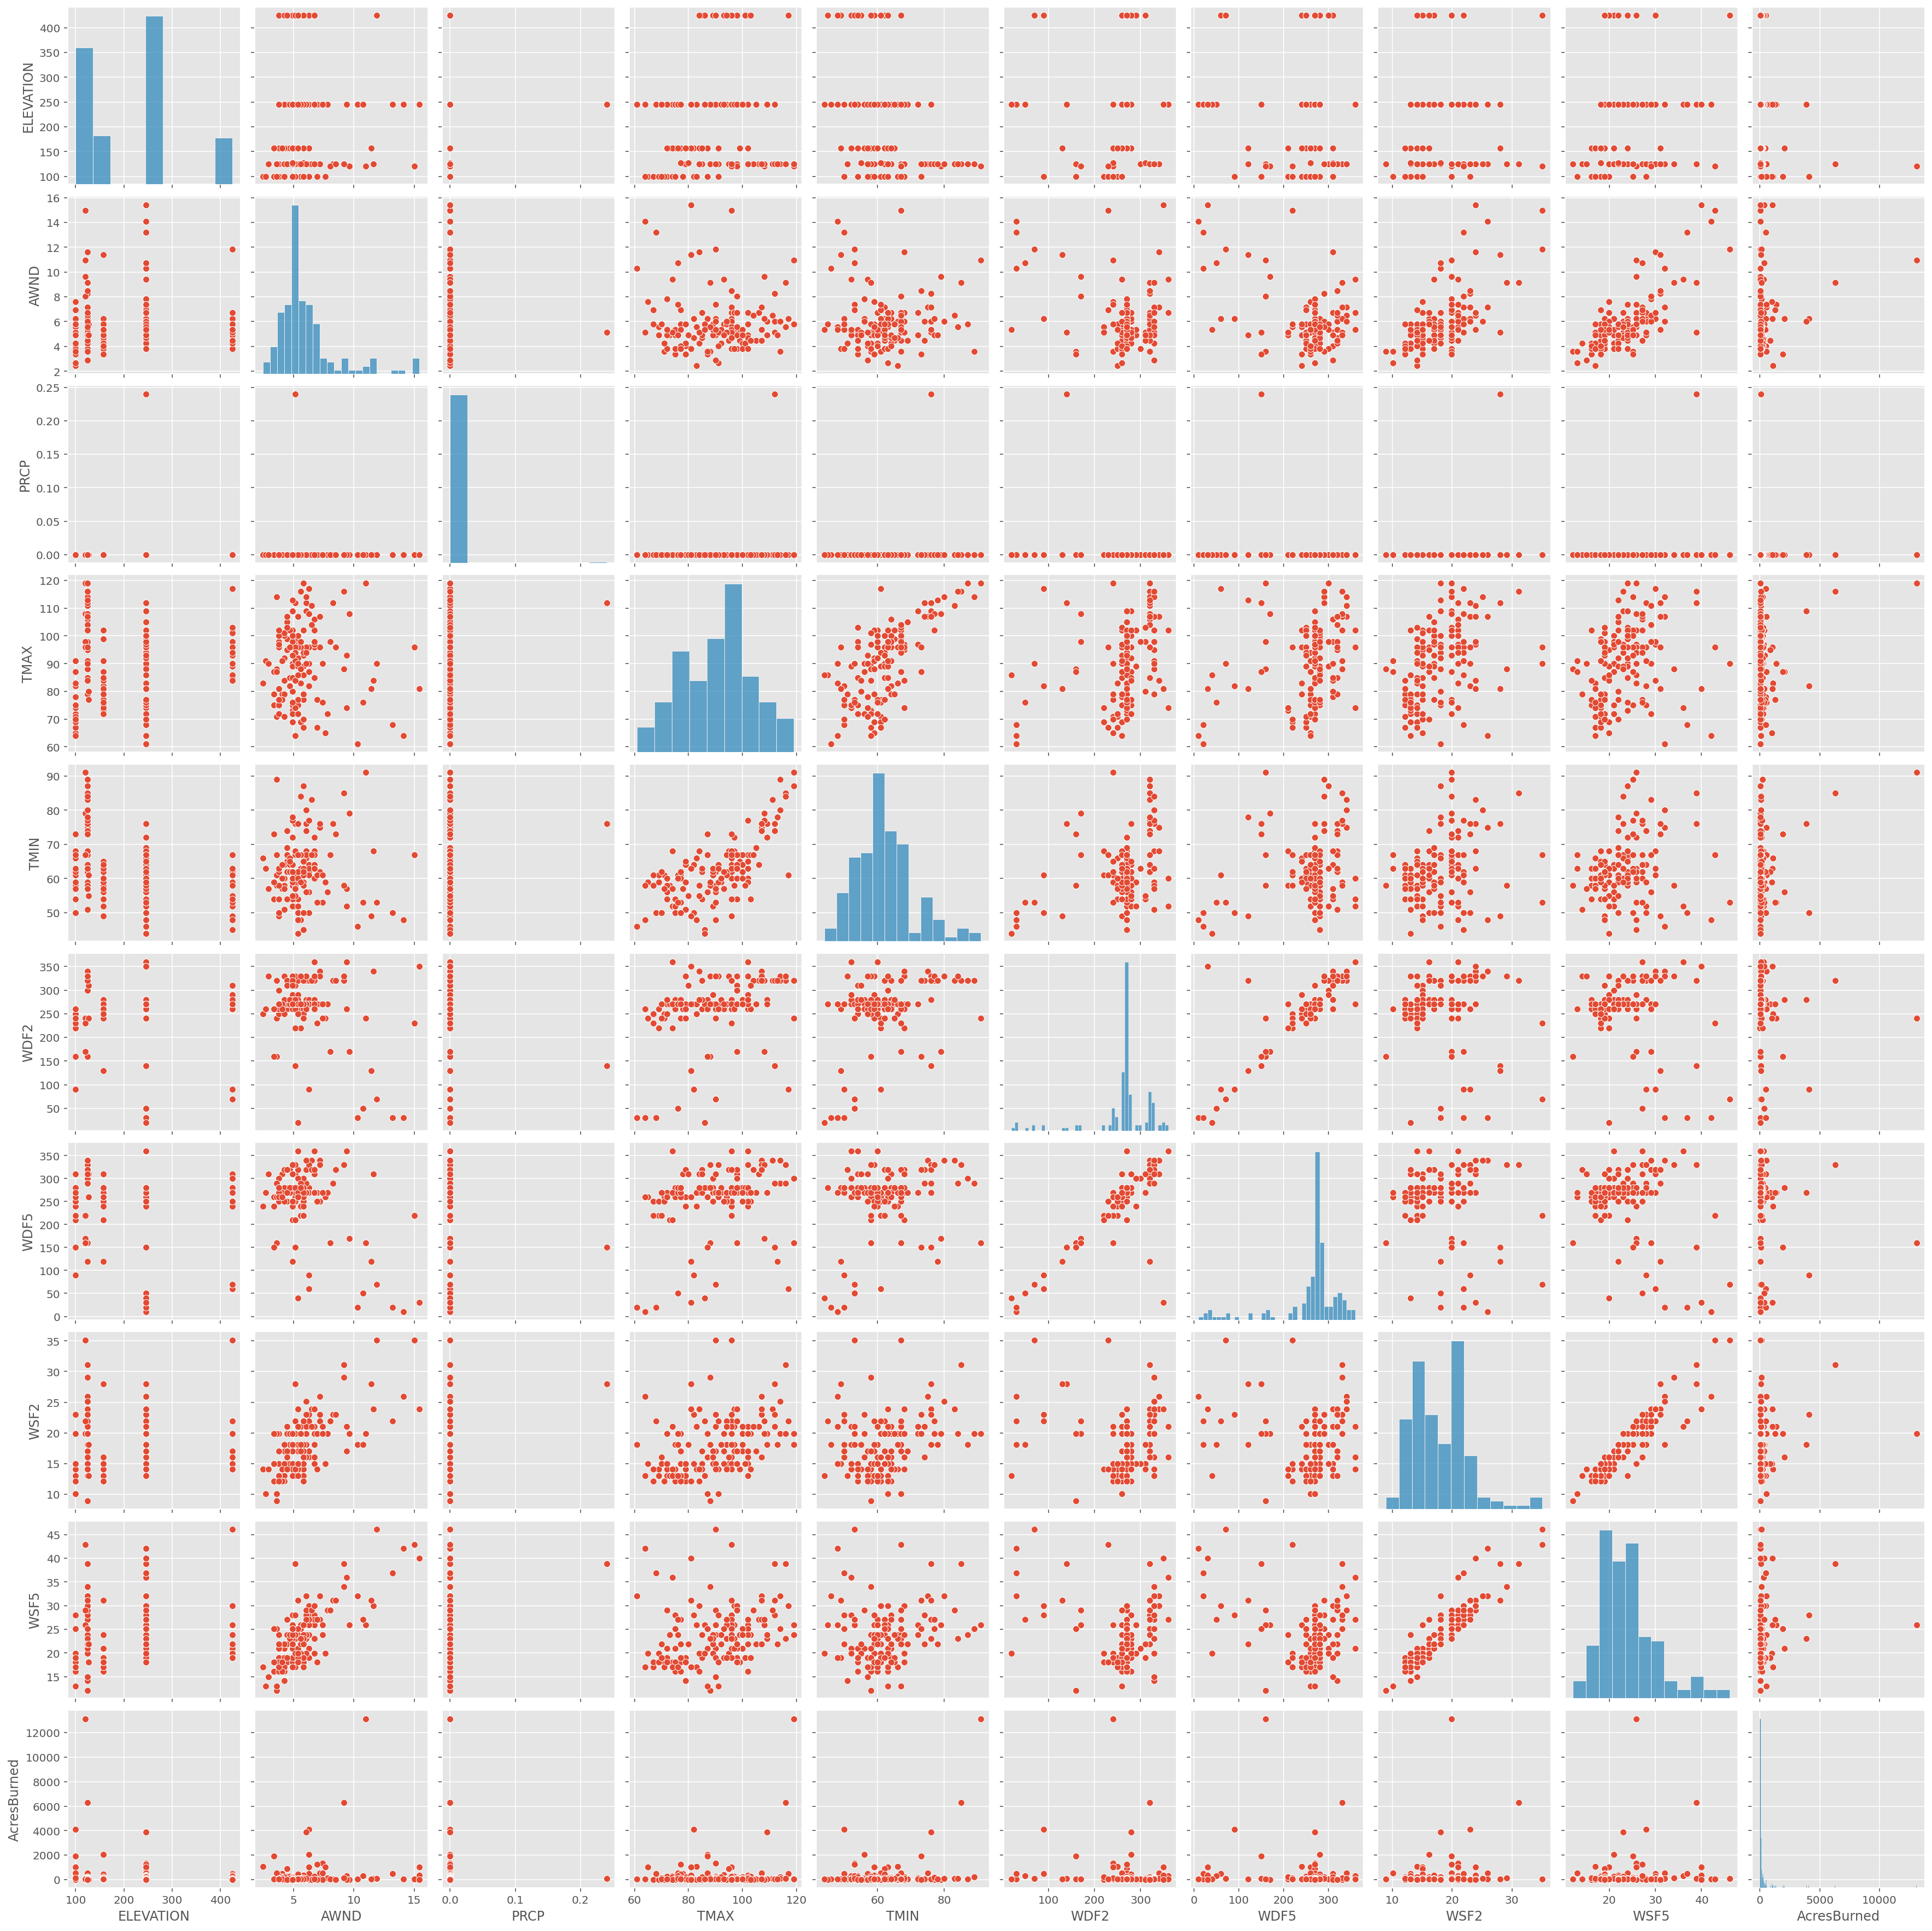

In [24]:
sns.pairplot(sub_mulit_df)
plt.show();

# The search for the best model

In [25]:
m_full = sm.formula.ols(formula = 'AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5', data = sub_mulit_df)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            AcresBurned   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           0.000478
Time:                        23:39:43   Log-Likelihood:                -1319.0
No. Observations:                 156   AIC:                             2658.
Df Residuals:                     146   BIC:                             2688.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2137.5211    971.810     -2.200      0.0

In [26]:
full_predictors_r2 = multi_reg.rsquared
print('R2: ', full_predictors_r2)

R2:  0.1806896191056223


# Using Backward elimination to select the best predictors

In [79]:
predictor_names = ['ELEVATION','AWND','PRCP','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5']

In [80]:
def name_list_to_map(name_list):
    result = {}
    for s in name_list:
        names = name_list.copy()
        names.remove(s)
        result[s] = names
    return result

In [81]:
name_dict = name_list_to_map(predictor_names)

In [82]:
def contact_linear_regression_parameter(predictor_name_list):
    # 'AcresBurned ~ ELEVATION + AWND + PRCP + TMAX + TMIN + WDF2 + WDF5 + WSF2 + WSF5'
    key = ''
    if len(predictor_name_list) > 0:
        param = 'AcresBurned ~ '

        names = ' + '.join(predictor_name_list)

        key = param + names
    
    return key

# contact_linear_regression_parameter(predictor_names)

In [83]:
def select_best_predictors(input_predicts):
    
    result = 0.0
    if input_predicts:
        ml_result = sm.formula.ols(formula = input_predicts, data = sub_mulit_df)
        ml_reg = ml_result.fit()
        result = ml_reg.rsquared
    return result   

In [84]:
def get_predictors_with_r2_highest(input_name_dict):
    highest = 0.0
    removed_key = ''
    for key, value in input_name_dict.items():
        input_predicts = contact_linear_regression_parameter(value)
        r2 = select_best_predictors(input_predicts)
        if r2 > highest:
            highest = r2
            removed_key = key
    
    result = []
    if removed_key != '':
        print("remove %s, keep %s, we get the highest r2 = %.8f" %(removed_key,input_name_dict[removed_key], highest))
        
        result = input_name_dict[removed_key]
    return result



In [85]:
get_predictors_with_r2_highest(name_dict)

remove WSF2, keep ['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF5'], we get the highest r2 = 0.18067891


['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF5']

In [87]:
def recursive_get_highest_predictors(name_dict):
    if not name_dict:
        return
    else:
        remained_names = get_predictors_with_r2_highest(name_dict)
        # print(remained_names)
        remained_dic = name_list_to_map(remained_names)
        # print(remained_dic)
        recursive_get_highest_predictors(remained_dic)
        return

In [88]:
recursive_get_highest_predictors(name_dict)

remove WSF2, keep ['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF5'], we get the highest r2 = 0.18067891
remove WDF2, keep ['ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.18052868
remove PRCP, keep ['ELEVATION', 'AWND', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17970548
remove ELEVATION, keep ['AWND', 'TMAX', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17708006
remove TMAX, keep ['AWND', 'TMIN', 'WDF5', 'WSF5'], we get the highest r2 = 0.17393319
remove WDF5, keep ['AWND', 'TMIN', 'WSF5'], we get the highest r2 = 0.15745645
remove WSF5, keep ['AWND', 'TMIN'], we get the highest r2 = 0.13552140
remove AWND, keep ['TMIN'], we get the highest r2 = 0.08795532


# Because Backward elimination shows that R2 can not increase, the climate data can not predict the wildfires.

In [93]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [94]:
model = forward_selected(sub_mulit_df, 'AcresBurned')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

AcresBurned ~ TMIN + AWND + WSF5 + WDF5 + 1
0.15219459252351353


In [97]:
sub_mulit_df['fire_flag'] = sub_mulit_df.apply(lambda row: 1 if row['AcresBurned'] > 0 else 0, axis=1)
sub_mulit_df.head(2)

<ipython-input-97-18d6beb42718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_mulit_df['fire_flag'] = sub_mulit_df.apply(lambda row: 1 if row['AcresBurned'] > 0 else 0, axis=1)


,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,AcresBurned,fire_flag
0,124.7,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,6309.0,1
1,100.0,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,4100.0,1


In [98]:
model = forward_selected(sub_mulit_df, 'fire_flag')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

fire_flag ~ WSF5 + ELEVATION + 1
0.031991685889822596


In [103]:
df_test = pd.DataFrame({'col1': [1, 2, 3, 4], 'col2': [5, 6, 7, 8], 'col3': [2, 1, 0, 1]})
df_test['col22'] = df_test['col2'] * df_test['col2']
df_test['col33'] = df_test['col3'] * df_test['col3']

m_full = sm.formula.ols(formula = 'col1 ~ col2 + col3', data = df_test)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   col1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.028e+30
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.97e-16
Time:                        00:58:38   Log-Likelihood:                 134.83
No. Observations:                   4   AIC:                            -263.7
Df Residuals:                       1   BIC:                            -265.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0000    4.9e-15  -8.16e+14      0.0

D:\dev\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
model = forward_selected(df_test, 'col1')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

# III. Predict fire and no-fire data set by Logistic Regression

In [150]:
# load the wildfire climate data
fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_Fire_nearest_climate.csv')
fire_climate_df.shape

(164, 24)

In [151]:
# load the no wildfire climate data
no_fire_climate_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_No_Fire_nearest_climate.csv')
no_fire_climate_df.shape

(9697, 24)

In [152]:
# select no fire climate data randomly
random_no_fire_climate_df = no_fire_climate_df.sample(n=164)
random_no_fire_climate_df.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,fire_flag
5367,"SAN DIEGO MONTGOMERY FIELD, CA US",32.81583,-117.13944,127.1,2019-11-03,2.91,0.0,80.0,49.0,290.0,300.0,13.0,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0
5695,"RAMONA AIRPORT, CA US",33.03750,-116.91583,424.6,2017-10-01,4.92,0.0,80.0,56.0,310.0,260.0,15.0,19.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0


# Exploring the data TODO

In [153]:
fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,161.000000,164.000000,162.000000,164.000000,162.000000,41.0,7.0,1.0,0.0,3.0,24.0,19.0,0.0,0.0,164.0
mean,33.527316,-117.066355,210.843293,5.998293,0.001472,90.542683,62.155280,262.926829,254.320988,18.041463,23.856173,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
std,0.508569,0.510017,96.805771,2.464238,0.018798,13.119250,8.743254,62.924393,71.790556,4.680109,6.362379,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,100.000000,2.460000,0.000000,61.000000,44.000000,20.000000,10.000000,8.900000,12.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
25%,33.105420,-117.438610,124.700000,4.700000,0.000000,79.750000,57.000000,260.000000,252.500000,14.775000,19.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
50%,33.822200,-117.279440,245.200000,5.370000,0.000000,92.000000,62.000000,270.000000,270.000000,17.000000,23.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
75%,33.951940,-116.915830,245.200000,6.317500,0.000000,98.000000,67.000000,280.000000,280.000000,21.000000,27.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
max,33.951940,-114.714200,424.600000,15.430000,0.240000,119.000000,91.000000,360.000000,360.000000,35.100000,46.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0


In [154]:
random_no_fire_climate_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,fire_flag
count,164.000000,164.000000,164.000000,164.000000,162.000000,164.000000,164.000000,164.000000,160.000000,164.000000,160.000000,50.0,12.0,3.0,0.0,1.0,5.0,26.0,0.0,0.0,164.0
mean,33.176857,-116.842024,139.159756,5.365610,0.019506,77.750000,56.920732,250.670732,251.937500,15.260366,19.985625,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0
std,0.493403,0.751758,106.867372,2.251094,0.111036,12.356353,11.308819,72.129154,74.187396,4.572130,6.240493,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
min,32.572220,-117.438610,4.600000,1.120000,0.000000,52.000000,30.000000,20.000000,10.000000,8.100000,10.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0
25%,32.733600,-117.219860,100.000000,3.800000,0.000000,69.000000,50.000000,237.500000,240.000000,13.000000,16.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0
50%,33.037500,-117.139440,124.700000,4.920000,0.000000,76.000000,57.500000,270.000000,270.000000,14.100000,18.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0
75%,33.669500,-116.915830,157.000000,6.040000,0.000000,84.000000,64.000000,300.000000,300.000000,17.000000,23.000000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0
max,33.951940,-114.714200,424.600000,14.320000,1.190000,114.000000,90.000000,350.000000,350.000000,36.000000,48.100000,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0


variable         | description
---------------- | -----------
`fire_flag`      | 1 is fire, 0 is no-fire

In [155]:
# merge the two dataset together
merged_two_pd = pd.concat([fire_climate_df, random_no_fire_climate_df])
merged_two_pd.shape

(328, 24)

In [156]:
merged_two_pd.isnull().sum()

NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
AWND           0
PRCP           3
TMAX           0
TMIN           3
WDF2           0
WDF5           6
WSF2           0
WSF5           6
WT01         237
WT02         309
WT03         324
WT04         328
WT05         324
WT07         299
WT08         283
WT10         328
WT11         328
County         0
fire_flag      0
dtype: int64

WT01 - WT11 can be dummy variables. We will use 0 to fill NaN.

In [157]:
# awnd_acres_sub_df.dropna(inplace=True)
merged_two_pd['WT01'].fillna(0, inplace=True)
merged_two_pd['WT02'].fillna(0, inplace=True)
merged_two_pd['WT03'].fillna(0, inplace=True)
merged_two_pd['WT04'].fillna(0, inplace=True)
merged_two_pd['WT05'].fillna(0, inplace=True)
merged_two_pd['WT07'].fillna(0, inplace=True)
merged_two_pd['WT08'].fillna(0, inplace=True)
merged_two_pd['WT10'].fillna(0, inplace=True)
merged_two_pd['WT11'].fillna(0, inplace=True)

# convert float to int
merged_two_pd['WT01'] = merged_two_pd['WT01'].astype(int)
merged_two_pd['WT02'] = merged_two_pd['WT02'].astype(int)
merged_two_pd['WT03'] = merged_two_pd['WT03'].astype(int)
merged_two_pd['WT04'] = merged_two_pd['WT04'].astype(int)
merged_two_pd['WT05'] = merged_two_pd['WT05'].astype(int)
merged_two_pd['WT07'] = merged_two_pd['WT07'].astype(int)
merged_two_pd['WT08'] = merged_two_pd['WT08'].astype(int)
merged_two_pd['WT10'] = merged_two_pd['WT10'].astype(int)
merged_two_pd['WT11'] = merged_two_pd['WT11'].astype(int)

In [158]:
# drop nan for other columns
merged_two_pd.dropna(inplace=True)

In [159]:
merged_two_pd.isnull().sum()

NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
DATE         0
AWND         0
PRCP         0
TMAX         0
TMIN         0
WDF2         0
WDF5         0
WSF2         0
WSF5         0
WT01         0
WT02         0
WT03         0
WT04         0
WT05         0
WT07         0
WT08         0
WT10         0
WT11         0
County       0
fire_flag    0
dtype: int64

In [160]:
merged_two_pd.shape

(316, 24)

In [161]:
merged_two_pd.head(2)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT10,WT11,County,fire_flag
0,"PALM SPRINGS ASOS, CA US",33.82220,-116.50430,124.7,2017-06-26,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9,0,0,0,0,0,1,0,0,0,Riverside,1
1,"CARLSBAD MCCLELLAN PALOMAR AIRPORT, CA US",33.12806,-117.27944,100.0,2017-12-07,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0,0,0,0,0,0,0,0,0,0,San Diego,1


# Logistic Regression to predict the fires

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
merged_two_pd.columns

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND', 'PRCP',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT07', 'WT08', 'WT10', 'WT11', 'County', 'fire_flag'],
      dtype='object')

In [252]:
# x = merged_two_pd[['ELEVATION', 'AWND', 'PRCP',
#       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
#       'WT04', 'WT05', 'WT07', 'WT08', 'WT10', 'WT11']]

x = merged_two_pd[[ 'ELEVATION', 'AWND', 'PRCP', 
                   'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']]

y = merged_two_pd['fire_flag']

In [253]:
x.head(2)

,ELEVATION,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,124.7,9.17,0.0,116.0,85.0,320.0,330.0,31.1,38.9
1,100.0,6.26,0.0,82.0,50.0,90.0,90.0,23.0,28.0


In [254]:
y.head(2)

0    1
1    1
Name: fire_flag, dtype: int64

In [255]:
# Build the training and test
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

In [256]:
# building the model and fitting the data
log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.610964
         Iterations 8


In [257]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              fire_flag   No. Observations:                  252
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            8
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.1160
Time:                        22:24:58   Log-Likelihood:                -153.96
converged:                       True   LL-Null:                       -174.16
Covariance Type:            nonrobust   LLR p-value:                 2.694e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ELEVATION      0.0011      0.002      0.641      0.522      -0.002       0.005
AWND          -0.2731      0.110     -2.477      0.013      -0.489      -0.057
PRCP         -11.8668      7.130     -1.664      0.096     -25.841       2.108
TMAX           0.0357      0.020      1.803      0.071      -0.003       0.074
TMIN          -0.0277      0.024     -1.175      0.240      -0.074       0.019
WDF2          -0.0096      0.005     -1.800      0.072      -0.020       0.001
WDF5           0.0022      0.005      0.468      0.640      -0.007       0.011
WSF2          -0.0239      0.089     -0.268      0.789      -0.199       0.151
WSF5           0.1171      0.069      1.700      0.089      -0.018       0.252
==============================================================================
"""

In [260]:
# table = sm.stats.anova_lm(log_reg, test = 'Chisq') # Chisq ANOVA

# Evaluate the model for logstic regression

- split two models. 
    - model 1: p of variables > 0.1
    - model 2: p of variables <= 0.1

In [263]:
# model 1: p of variables > 0.1
def model_1():
    x = merged_two_pd[['ELEVATION', 'TMIN', 'WDF5', 'WSF2']]

    y = merged_two_pd['fire_flag']

    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    print(log_reg.summary())
model_1()

Optimization terminated successfully.
         Current function value: 0.654133
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  252
Model:                          Logit   Df Residuals:                      248
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                 0.05353
Time:                        22:54:39   Log-Likelihood:                -164.84
converged:                       True   LL-Null:                       -174.16
Covariance Type:            nonrobust   LLR p-value:                 0.0003235
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ELEVATION      0.0040      0.001      3.015      0.003       0.001       0.007
TMIN          -0.0011      0.

In [265]:
# model 2: p of variables <= 0.1
def model_2():
    models = ['AWND', 'TMAX', 'WDF2', 'WSF5']
    x = merged_two_pd[['AWND', 'TMAX', 'WDF2', 'WSF5']]

    y = merged_two_pd['fire_flag']

    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    print(log_reg.summary())
    return models
model_2()

Optimization terminated successfully.
         Current function value: 0.632837
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  252
Model:                          Logit   Df Residuals:                      248
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                 0.08435
Time:                        22:56:27   Log-Likelihood:                -159.47
converged:                       True   LL-Null:                       -174.16
Covariance Type:            nonrobust   LLR p-value:                 1.863e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AWND          -0.3505      0.105     -3.345      0.001      -0.556      -0.145
TMAX           0.0225      0.

['AWND', 'TMAX', 'WDF2', 'WSF5']

### Conclusion

- model 2: (p of variables <= 0.1) is better than model 1: (p of variables > 0.1)

# Transfer Continuous variable to Categorical variable

- Using Q1, Q2, Q2 and Q4 to convert Continuous variable
    - For example: WDF2
        - Using Q1, Q2, Q2 and Q4 of WDF2 to splite the WDF2 as 4 levels

<AxesSubplot:>

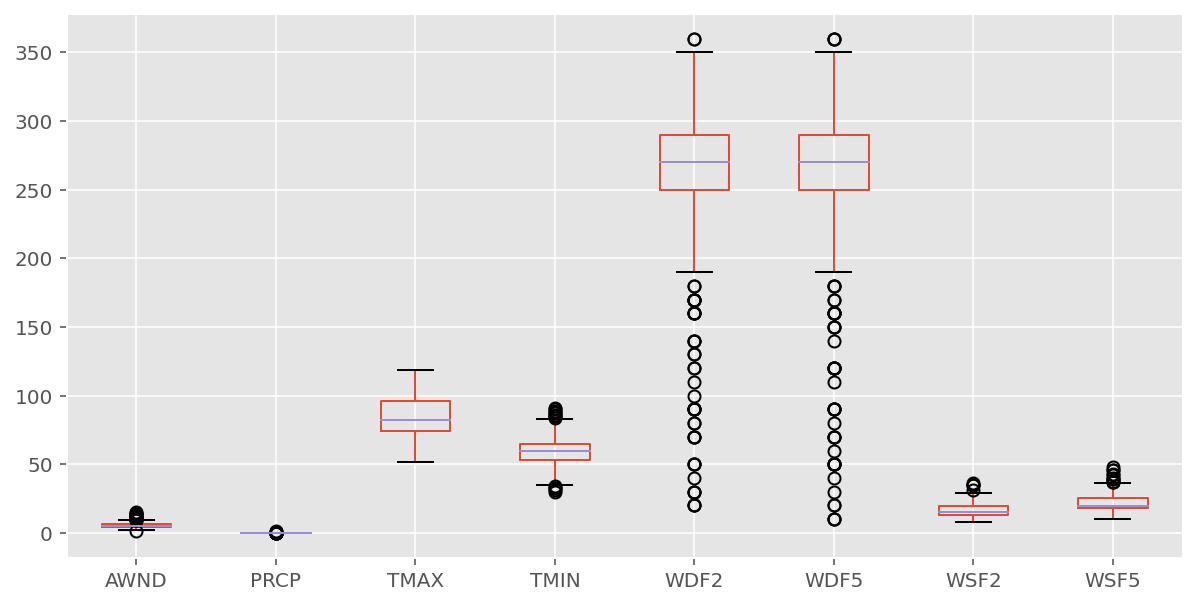

In [269]:
merged_two_pd[['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']].boxplot()

In [271]:
def get_4qs(df, col):
    result = {}
    result['q1'] = df[col].quantile(.25)
    result['q2'] = df[col].quantile(.50)
    result['q3'] = df[col].quantile(.75)
    return result

def get_level(q4_dict, a):
    level = 'q1'
    if a <= q4_dict.get('q1'):
        level = 'q1'
    elif a > q4_dict.get('q1') and a <= q4_dict.get('q2'):
        level = 'q2'
    elif a > q4_dict.get('q2') and a <= q4_dict.get('q3'):
        level = 'q3'
    else:
        level = 'q4'
        
    return level

def split_by_q1_to_q4(df, cols = ['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']):
    
    for col in cols:
        if col != 'fire_flag':
            q4_dict = get_4qs(df, col)

            df[col] = df.apply(lambda row: get_level(q4_dict, row[col]), axis=1)

sub_4q_df = merged_two_pd[['fire_flag', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']]
split_by_q1_to_q4(sub_4q_df)

sub_4q_df

<ipython-input-271-611704a80558>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.apply(lambda row: get_level(q4_dict, row[col]), axis=1)


,fire_flag,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,1,q4,q1,q4,q4,q4,q4,q4,q4
1,1,q3,q1,q2,q1,q1,q1,q4,q4
2,1,q3,q1,q4,q4,q3,q2,q3,q3
3,1,q3,q1,q3,q2,q3,q3,q3,q3
4,1,q4,q1,q3,q1,q1,q2,q4,q4
...,...,...,...,...,...,...,...,...,...
8064,0,q3,q1,q3,q3,q2,q3,q3,q4
567,0,q1,q1,q2,q3,q1,q2,q1,q1
1125,0,q3,q4,q1,q2,q1,q2,q2,q2
775,0,q4,q4,q1,q2,q1,q1,q3,q3


In [272]:
# To get dummy variables.
sub_dummy_df = pd.get_dummies(sub_4q_df)
sub_dummy_df.head(3)

,fire_flag,AWND_q1,AWND_q2,AWND_q3,AWND_q4,PRCP_q1,PRCP_q4,TMAX_q1,TMAX_q2,TMAX_q3,TMAX_q4,TMIN_q1,TMIN_q2,TMIN_q3,TMIN_q4,WDF2_q1,WDF2_q2,WDF2_q3,WDF2_q4,WDF5_q1,WDF5_q2,WDF5_q3,WDF5_q4,WSF2_q1,WSF2_q2,WSF2_q3,WSF2_q4,WSF5_q1,WSF5_q2,WSF5_q3,WSF5_q4
0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [273]:
# To choose dataset of X
fire_X = sub_dummy_df.iloc[:,1:]
fire_X.head(2)

,AWND_q1,AWND_q2,AWND_q3,AWND_q4,PRCP_q1,PRCP_q4,TMAX_q1,TMAX_q2,TMAX_q3,TMAX_q4,TMIN_q1,TMIN_q2,TMIN_q3,TMIN_q4,WDF2_q1,WDF2_q2,WDF2_q3,WDF2_q4,WDF5_q1,WDF5_q2,WDF5_q3,WDF5_q4,WSF2_q1,WSF2_q2,WSF2_q3,WSF2_q4,WSF5_q1,WSF5_q2,WSF5_q3,WSF5_q4
0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [275]:
# to choose dataset of Y
fire_Y = sub_dummy_df.iloc[:,0]
fire_Y.head(2)

0    1
1    1
Name: fire_flag, dtype: int64

In [276]:
# do logistic regression fit
# Build the training and test
x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

# building the model and fitting the data
log_reg = sm.Logit(y_train, x_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.487572
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              fire_flag   No. Observations:                  252
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                           22
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.2945
Time:                        23:24:03   Log-Likelihood:                -122.87
converged:                       True   LL-Null:                       -174.16
Covariance Type:            nonrobust   LLR p-value:                 2.265e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AWND_q1        1.5422        nan        nan        nan         nan         nan
AWND_q2        0.7616        

In [277]:
from sklearn.linear_model import LogisticRegression
climate_lr = LogisticRegression()
result = climate_lr.fit(x_train,y_train)
print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))

The socre of train set is 0.7619047619047619
The socre of test set is 0.734375


# 优化

,fire_flag,TMAX,WDF5
0,1,q4,q4
1,1,q2,q1


In [309]:
# ['fire_flag', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']
def test_optimize(cols = ['fire_flag', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5']):
    # sub_4q_df2 = sub_4q_df[['fire_flag','TMAX','WDF5']]
    sub_4q_df2 = sub_4q_df[cols]

    sub_dummy_df = pd.get_dummies(sub_4q_df2)

    # To choose dataset of X
    fire_X = sub_dummy_df.iloc[:,1:]

    # to choose dataset of Y
    fire_Y = sub_dummy_df.iloc[:,0]

    # Build the training and test
    x_train,x_test,y_train,y_test = train_test_split(fire_X, fire_Y,test_size=0.2, random_state=17)

    # building the model and fitting the data
    log_reg = sm.Logit(y_train, x_train).fit()

    # print(log_reg.summary())
    # print("The prsquared is %0.8f" %log_reg.prsquared)

    climate_lr = LogisticRegression()
    result = climate_lr.fit(x_train,y_train)
    # print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))
    # print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))
    
    return log_reg.prsquared, climate_lr.score(x_train,y_train), climate_lr.score(x_test,y_test)
    
test_optimize(['fire_flag', 'PRCP', 'TMAX', 'WDF5', 'WSF5'])

Optimization terminated successfully.
         Current function value: 0.526271
         Iterations 11


(0.2385355764386422, 0.7261904761904762, 0.75)

In [289]:
import itertools
print(list(itertools.combinations([1,2,3,4], 3)))

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]


In [323]:
def find_best():
    r2_max = 0
    train_max = 0
    test_max = 0
    comb = ''
    lst = list(itertools.combinations(['AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], 7))
    for l in lst:
        a = ['fire_flag']
        a.extend(list(l))
        # print(a)
        r2, train_score, test_score = test_optimize(a)
        
        #if r2 > r2_max:
        #    r2_max = r2
        #    comb = a
        
        if r2 > r2_max:
            r2_max = r2
            comb = a
    
    print(r2_max)
    print(comb)
find_best()
        # print('-------------------------------------------------------------------')

         Current function value: 0.503498
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.495810
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.491191
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.500138
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.502374
         Iterations 33
Optimization terminated successfully.
         Current function value: 0.505755
         Iterations 7
Optimization terminated successfully.

D:\dev\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



         Current function value: 0.497352
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.501365
         Iterations 15
0.28929252057956634
['fire_flag', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WSF2', 'WSF5']


['fire_flag', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WSF5']

Optimization terminated successfully.

         Current function value: 0.531692
         
         Iterations 7
         
The prsquared is 0.23069225

The socre of train set is 0.75

The socre of test set is 0.796875


# 下面代码仅仅用于测试

In [247]:
x = merged_two_pd[[ 'TMAX', 'WDF5']]

y = merged_two_pd['fire_flag']

# Build the training and test
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=17)

# building the model and fitting the data
log_reg = sm.Logit(y_train, x_train).fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.663544
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              fire_flag   No. Observations:                  252
Model:                          Logit   Df Residuals:                      250
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                 0.03991
Time:                        21:40:16   Log-Likelihood:                -167.21
converged:                       True   LL-Null:                       -174.16
Covariance Type:            nonrobust   LLR p-value:                 0.0001925
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TMAX           0.0198      0.006      3.430      0.001       0.008       0.031
WDF5          -0.0056      0.002     -3.026      0.002      -0.009      -0.002
==============================================================================
"""

In [248]:
from sklearn.linear_model import LogisticRegression
climate_lr = LogisticRegression()
result = climate_lr.fit(x_train,y_train)
result

LogisticRegression()

In [249]:
print("The socre of train set is {}".format(climate_lr.score(x_train,y_train)))

The socre of train set is 0.7182539682539683


In [250]:
print("The socre of test set is {}".format(climate_lr.score(x_test,y_test)))

The socre of test set is 0.78125


In [ ]:
78%